1) Introduction
Import Libraries
Load data
Run Statistical summeries
Figure out missing value columns

2) Visualizations
Correlation with target variable

3) Missing values imputation
train data Missing columns- Embarked,Age,Cabin
test data Missing columns- Age and Fare

4) Feature Engineering
Calculate total family size
Get title from name
Find out which deck passenger belonged to
Dealing with Categorical Variables
Label encoding
Feature Scaling

5) Prediction
Split into training & test sets
Build the model
Feature importance
Predictions
Ensemble : Majority voting

6) Submission

## 1. Import Libraries

In [26]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np

## 2. Load train and test data

In [31]:
titanic = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#lets see if there are any more columns with missing values 
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#how about test set??
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Missing Value in Fare, no missing values for Embarked

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

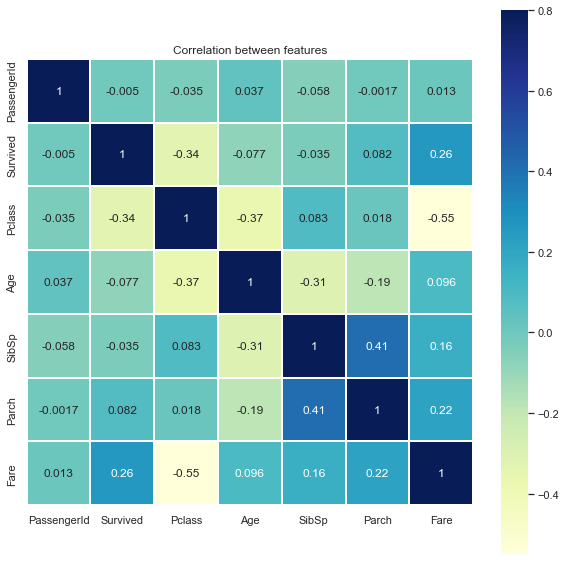

In [40]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## 3. Missing Value Imputation

#### Embarked Column

In [41]:
 #Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


PassengerId 62 and 830 have missing embarked values

Both have Passenger class 1 and fare $80.

In [50]:
titanic[titanic['Fare'] >75] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'

In [59]:
titanic["Embarked"] = titanic["Embarked"].fillna('C')

#### Embarked Column TEST

In [66]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [65]:
#Function that takes the median of passengers from PCLASS 3 that embarked throught 'S'

def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

test=fill_missing_fare(test)

## 4. FEATURE ENGINEERING

#### Let's Start with Cabin and creating new variable: DECK

In [67]:
titanic["Deck"]=titanic.Cabin.str[0]
test["Deck"]=test.Cabin.str[0]
titanic["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

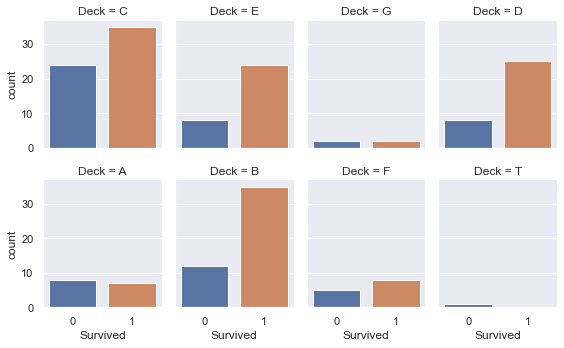

In [68]:
# we plot the difference in terms of survival rate by Deck
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);

In [70]:
titanic.Deck.fillna('Z', inplace=True)
test.Deck.fillna('Z', inplace=True)
titanic["Deck"].unique() # Z is for null values

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### Family Members. We know that we can find out how big a family is by SIBSP + PARCH+PASSENGER (1)

In [71]:
# Create a family size variable including the passenger themselves
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
test["FamilySize"] = test["SibSp"] + test["Parch"]+1
print(titanic["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [72]:
# Discretize family size
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic.loc[(titanic["FamilySize"] > 1)  &  (titanic["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'

test.loc[test["FamilySize"] == 1, "FsizeD"] = 'singleton'
test.loc[(test["FamilySize"] >1) & (test["FamilySize"] <5) , "FsizeD"] = 'small'
test.loc[test["FamilySize"] >4, "FsizeD"] = 'large'
print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['small' 'singleton' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


#### Let's talk about naming lenght......How long are names, would names have correlation with survival rate?

['okay', 'good', 'short', 'long']
Categories (4, object): ['short' < 'okay' < 'good' < 'long']


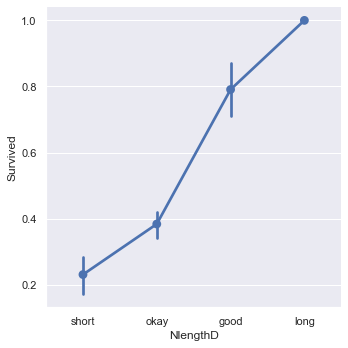

In [76]:
#Create feature for length of name 
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))
test["NameLength"] = test["Name"].apply(lambda x: len(x))

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
titanic['NlengthD'] = pd.cut(titanic['NameLength'], bins, labels=group_names)
test['NlengthD'] = pd.cut(test['NameLength'], bins, labels=group_names)

sns.factorplot(x="NlengthD", y="Survived", data=titanic)
print(titanic["NlengthD"].unique())

#### Now, what's inside the name column?

In [78]:
import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))


#Add in the title column.
titanic["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic.loc[titanic["Title"] == "Mlle", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Ms", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Mme", "Title"] = 'Mrs'
titanic.loc[titanic["Title"] == "Dona", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Lady", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Countess", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Capt", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Col", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Don", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Major", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Rev", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Sir", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Dr", "Title"] = 'Rare Title'

titanic["Title"].value_counts()


titles = test["Name"].apply(get_title)
print(pd.value_counts(titles))

#Add in the title column.
test["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
test.loc[test["Title"] == "Mlle", "Title"] = 'Miss'
test.loc[test["Title"] == "Ms", "Title"] = 'Miss'
test.loc[test["Title"] == "Mme", "Title"] = 'Mrs'
test.loc[test["Title"] == "Dona", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Lady", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Countess", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Capt", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Col", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Don", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Major", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Rev", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Sir", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Dr", "Title"] = 'Rare Title'

test["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64


Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

#### TICKET COLUMN - Your Turn

In [81]:
titanic["TicketNumber"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)
titanic["TicketNumber"] = titanic["TicketNumber"].apply(pd.to_numeric)

In [82]:
test["TicketNumber"] = test["Ticket"].str.extract('(\d{2,})', expand=True)
test["TicketNumber"] = test["TicketNumber"].apply(pd.to_numeric)

In [83]:
#some rows in ticket column dont have numeric value so we got NaN there
titanic[titanic["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,1,singleton,17,short,Mrs,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Z,1,singleton,24,okay,Mr,NaN


In [85]:
#As we are talking about numbers that are like 'IDS' best option is to fillna with median
titanic.TicketNumber.fillna(titanic["TicketNumber"].median(), inplace=True)
test.TicketNumber.fillna(test["TicketNumber"].median(), inplace=True)

## 5. Convert Categorical variables into Numerical ones

In [87]:
{column: len(titanic[column].unique()) for column in titanic.select_dtypes('object').columns}

{'Name': 891,
 'Sex': 2,
 'Ticket': 681,
 'Cabin': 148,
 'Embarked': 3,
 'Deck': 9,
 'FsizeD': 3,
 'Title': 5}

In [89]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEncoder=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    titanic[col]=labelEncoder.fit_transform(titanic[col])
    test[col]=labelEncoder.fit_transform(test[col])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8,2,2,23,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,2,51,0,3,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8,1,1,22,2,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,2,44,0,3,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8,1,1,24,2,2,373450.0


#### Age Column - Fill with mean

In [99]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)

## 6. FEATURE SCALING

In [101]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(test[['Age', 'Fare']])
test[['Age', 'Fare']] = std_scale.transform(test[['Age', 'Fare']])

## Correlation of features with target

In [103]:
titanic.corr()["Survived"]

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.078601
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Title          -0.071174
TicketNumber   -0.096161
Name: Survived, dtype: float64

## MODEL SELECTION, HYPERPARAMETER TUNNING

In [202]:
target = 'Survived'
predictors = ["PassengerId","Pclass", "Sex", "Age",
              "Fare","NlengthD","NameLength", "FsizeD", "Title","Deck"]

In [203]:
y = titanic[target]
X = titanic[predictors]

In [204]:
X_train = X
y_train = y

In [207]:
X_train.set_index("PassengerId", inplace = True)

KeyError: "None of ['PassengerId'] are in the columns"

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [209]:
# Calculo del AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Calculo del AUC de un modelo sobre un dataset con Cross-Validation (X-y). Args: modelo a validar, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, X, y, cv=4, scoring='roc_auc')    # Definimos cuantos KFolds (cv) y la metrica validacion (scoring)
  return cross_val.mean()

In [210]:
#Ejemplo
from sklearn.linear_model import LogisticRegression
print('AUC en TRAIN:', auc(LogisticRegression(),X_train,y_train) )
print('AUC en CROSS VALIDATION:', auc_cross_validation(LogisticRegression(),X_train,y_train) )

AUC en TRAIN: 0.8636915604128718
AUC en CROSS VALIDATION: 0.8544873800006744


In [211]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)
def evaluate_classification(label, model, X, y):
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)                  
  label_.append(label)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)
  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [212]:
from sklearn.linear_model import LogisticRegression

evaluate_classification(label='Logistic Regression', 
                        model=LogisticRegression(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.863692,0.854487


In [213]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier

evaluate_classification(label='AdaBoost', 
                        model=AdaBoostClassifier(), 
                        X=X_train, y=y_train)

evaluate_classification(label='Bagging', 
                        model=BaggingClassifier(), 
                        X=X_train, y=y_train)

evaluate_classification(label='GradientBoosting', 
                        model=GradientBoostingClassifier(), 
                        X=X_train, y=y_train)

evaluate_classification(label='RandomForest', 
                        model=RandomForestClassifier(), 
                        X=X_train, y=y_train)

evaluate_classification(label='HistGradientBoosting', 
                        model=HistGradientBoostingClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,RandomForest,0.999968,0.872328
3,GradientBoosting,0.953789,0.872191
5,HistGradientBoosting,0.999190,0.869314
1,AdaBoost,0.909338,0.865169
0,Logistic Regression,0.863692,0.854487
2,Bagging,0.998581,0.843257


In [214]:
from xgboost import XGBClassifier

evaluate_classification(label='XGBoost', 
                        model=XGBClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,RandomForest,0.999968,0.872328
3,GradientBoosting,0.953789,0.872191
5,HistGradientBoosting,0.999190,0.869314
1,AdaBoost,0.909338,0.865169
6,XGBoost,0.999782,0.864283
0,Logistic Regression,0.863692,0.854487
2,Bagging,0.998581,0.843257


In [215]:
from sklearn.svm import SVC

evaluate_classification(label='Support Vector Machine (kernel=rbf)', 
                        model=SVC(probability=True), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,RandomForest,0.999968,0.872328
3,GradientBoosting,0.953789,0.872191
5,HistGradientBoosting,0.999190,0.869314
1,AdaBoost,0.909338,0.865169
6,XGBoost,0.999782,0.864283
0,Logistic Regression,0.863692,0.854487
2,Bagging,0.998581,0.843257
7,Support Vector Machine (kernel=rbf),0.818484,0.809467


### Hyperparameter Tunning

In [216]:
from sklearn.model_selection import RandomizedSearchCV

In [217]:
parameters_hp = {
    'loss': ['log_loss', 'deviance'], 
    'learning_rate': [0.01,0.1,0.3], 
    'n_estimators': [50,100,500,1000], 
    'subsample': [0.5,0.7,1],
    'max_depth': [3,4,5,6,7]
}

In [218]:
search_hp = RandomizedSearchCV(estimator = GradientBoostingClassifier(), 
                               param_distributions = parameters_hp,
                               scoring = 'roc_auc',                         # metrica a optimizar: AUC
                               cv = 4,                                      # numero de folds para cross-validation
                               n_iter = 20,                                 # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1, 
                               verbose=True)

In [219]:
search_hp.fit(X_train,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'loss': ['log_loss', 'deviance'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 500, 1000],
                                        'subsample': [0.5, 0.7, 1]},
                   scoring='roc_auc', verbose=True)

In [220]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, subsample=1)

 The best AUC: 0.874535356938344

 The best parameters across ALL searched params:
 {'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.01}


In [221]:
best_model = search_hp.best_estimator_

In [222]:
features_model =  list(best_model.feature_names_in_)

## LET'S PREDICT

In [190]:
target = 'Survived'
predictors = ["PassengerId","Pclass", "Sex", "Age",
              "Fare","NlengthD","NameLength", "FsizeD", "Title","Deck"]

In [191]:
X_pred = test[predictors]

In [192]:
predictions = best_model.predict(X_pred)

ValueError: X has 10 features, but GradientBoostingClassifier is expecting 9 features as input.

In [161]:
X_pred["Survived"] = predictions

In [164]:
X_pred.set_index('PassengerId', inplace = True)

In [165]:
titanic_submission = X_pred["Survived"]

In [166]:
titanic_submission

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [167]:
titanic_submission.to_csv('submission.csv')